# FRED Economic Survey analysis

## Installing dependencies

In [1]:
pip install fredapi

Note: you may need to restart the kernel to use updated packages.


### Importing libraries

In [2]:
import fredapi

In [3]:
from fredapi import Fred

In [211]:
## imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight') ## style
pd.set_option('display.max_columns',500) ### setting columns display
pd.set_option('display.max_colwidth',150)
color_pallete = plt.rcParams['axes.prop_cycle'].by_key()['color']  ### defining color pallete

from FRED_API import FRED_API_KEY


-----

In [210]:
### Creating Fred object
fred = Fred(api_key = FRED_API_KEY)

## Extracting Series

### S&P 500

In [6]:
sp_df = fred.search('S&P',order_by='popularity')

In [7]:
sp_df.head(3)

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2023-06-28   2023-06-28   
CSUSHPINSA          CSUSHPINSA     2023-06-28   2023-06-28   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2023-06-28   2023-06-28   

                                                              title  \
series id                                                             
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted Spread   
CSUSHPINSA          S&P/Case-Shiller U.S. National Home Price Index   
BAMLH0A0HYM2EY         ICE BofA US High Yield Index Effective Yield   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2023-06-27  Daily, Close   
CSUSHPINSA            1987-01-01      2023-04-01       Monthly   
BAMLH0A0HYM2EY        1996-12-31      2023-06-27  Daily, Close   

               frequency_short               units         units_short  \
series id                                                                
BAMLH0A0HYM2                 D             Percent                   %   
CSUSHPINSA                   M  Index Jan 2000=100  Index Jan 2000=100   
BAMLH0A0HYM2EY               D             Percent                   %   

                    seasonal_adjustment seasonal_adjustment_short  \
series id                                                           
BAMLH0A0HYM2    Not Seasonally Adjusted                       NSA   
CSUSHPINSA      Not Seasonally Adjusted                       NSA   
BAMLH0A0HYM2EY  Not Seasonally Adjusted                       NSA   

                             last_updated popularity  \
series id                                              
BAMLH0A0HYM2    2023-06-28 08:48:03-05:00         94   
CSUSHPINSA      2023-06-27 08:13:02-05:00         91   
BAMLH0A0HYM2EY  2023-06-28 08:48:07-05:00         83   

                                                                                                                                                                notes  
series id                                                                                                                                                              
BAMLH0A0HYM2    The ICE BofA Option-Adjusted Spreads (OASs) are the calculated spreads between a computed OAS index of all bonds in a given rating category and a ...  
CSUSHPINSA      For more information regarding the index, please visit Standard & Poor's (https://www.spglobal.com/spdji/en/documents/methodologies/methodology-sp...  
BAMLH0A0HYM2EY  This data represents the effective yield of the ICE BofA US High Yield Index, which tracks the performance of US dollar denominated below investme...

### Pulling Raw Data

In [8]:
sp500_df = fred.get_series(series_id = 'SP500')
sp500_df

2013-07-01    1614.96
2013-07-02    1614.08
2013-07-03    1615.41
2013-07-04        NaN
2013-07-05    1631.89
               ...   
2023-06-22    4381.89
2023-06-23    4348.33
2023-06-26    4328.82
2023-06-27    4378.41
2023-06-28    4376.86
Length: 2608, dtype: float64

<AxesSubplot:title={'center':'S&P500'}>

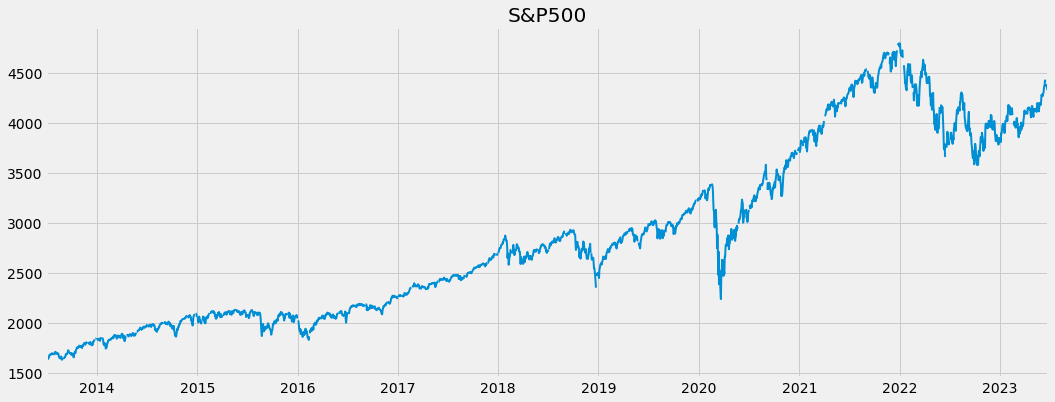

In [9]:
sp500_df.plot(title ='S&P500',lw=2,figsize=(16,6))

----
----

### Pulling multiple dataset and mergring

### Unemployment rate

In [10]:
##lets get unemployment data
uemp_results = fred.search('Unemployment Rate')
uemp_results


id realtime_start realtime_end  \
series id                                                      
UNRATE                    UNRATE     2023-06-28   2023-06-28   
UNRATENSA              UNRATENSA     2023-06-28   2023-06-28   
LNS14000006          LNS14000006     2023-06-28   2023-06-28   
NROU                        NROU     2023-06-28   2023-06-28   
LNU04000006          LNU04000006     2023-06-28   2023-06-28   
...                          ...            ...          ...   
LRUN64TTNZQ156S  LRUN64TTNZQ156S     2023-06-28   2023-06-28   
LRUN74TTRUM156N  LRUN74TTRUM156N     2023-06-28   2023-06-28   
LRUNTTTTGBQ156S  LRUNTTTTGBQ156S     2023-06-28   2023-06-28   
CASANJ8URN            CASANJ8URN     2023-06-28   2023-06-28   
MIOAKL5URN            MIOAKL5URN     2023-06-28   2023-06-28   

                                                                                   title  \
series id                                                                                  
UNRATE                                                                 Unemployment Rate   
UNRATENSA                                                              Unemployment Rate   
LNS14000006                                Unemployment Rate - Black or African American   
NROU                                                    Noncyclical Rate of Unemployment   
LNU04000006                                Unemployment Rate - Black or African American   
...                                                                                  ...   
LRUN64TTNZQ156S               Unemployment Rate: Aged 15-64: All Persons for New Zealand   
LRUN74TTRUM156N    Unemployment Rate: Aged 15-74: All Persons for the Russian Federation   
LRUNTTTTGBQ156S  Unemployment Rate: Aged 15 and Over: All Persons for the United Kingdom   
CASANJ8URN                                   Unemployment Rate in San Joaquin County, CA   
MIOAKL5URN                                       Unemployment Rate in Oakland County, MI   

                observation_start observation_end  frequency frequency_short  \
series id                                                                      
UNRATE                 1948-01-01      2023-05-01    Monthly               M   
UNRATENSA              1948-01-01      2023-05-01    Monthly               M   
LNS14000006            1972-01-01      2023-05-01    Monthly               M   
NROU                   1949-01-01      2033-10-01  Quarterly               Q   
LNU04000006            1972-01-01      2023-05-01    Monthly               M   
...                           ...             ...        ...             ...   
LRUN64TTNZQ156S        1986-01-01      2023-01-01  Quarterly               Q   
LRUN74TTRUM156N        1992-10-01      2021-12-01    Monthly               M   
LRUNTTTTGBQ156S        1971-01-01      2023-01-01  Quarterly               Q   
CASANJ8URN             1990-01-01      2023-05-01    Monthly               M   
MIOAKL5URN             1990-01-01      2023-05-01    Monthly               M   

                   units units_short      seasonal_adjustment  \
series id                                                       
UNRATE           Percent           %      Seasonally Adjusted   
UNRATENSA        Percent           %  Not Seasonally Adjusted   
LNS14000006      Percent           %      Seasonally Adjusted   
NROU             Percent           %  Not Seasonally Adjusted   
LNU04000006      Percent           %  Not Seasonally Adjusted   
...                  ...         ...                      ...   
LRUN64TTNZQ156S  Percent           %      Seasonally Adjusted   
LRUN74TTRUM156N  Percent           %  Not Seasonally Adjusted   
LRUNTTTTGBQ156S  Percent           %      Seasonally Adjusted   
CASANJ8URN       Percent           %  Not Seasonally Adjusted   
MIOAKL5URN       Percent           %  Not Seasonally Adjusted   

                seasonal_adjustment_short               last_updated  \
series id                                

In [11]:
uemp_df = fred.get_series('UNRATE')

In [12]:
uemp_df

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-01-01    3.4
2023-02-01    3.6
2023-03-01    3.5
2023-04-01    3.4
2023-05-01    3.7
Length: 905, dtype: float64

<AxesSubplot:title={'center':'Unemployment Rate'}>

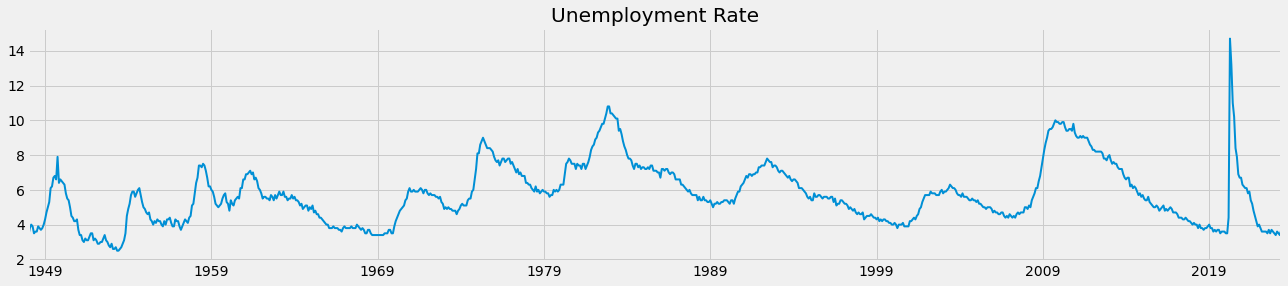

In [13]:
uemp_df.plot(title='Unemployment Rate',figsize=(20,4),lw=2)

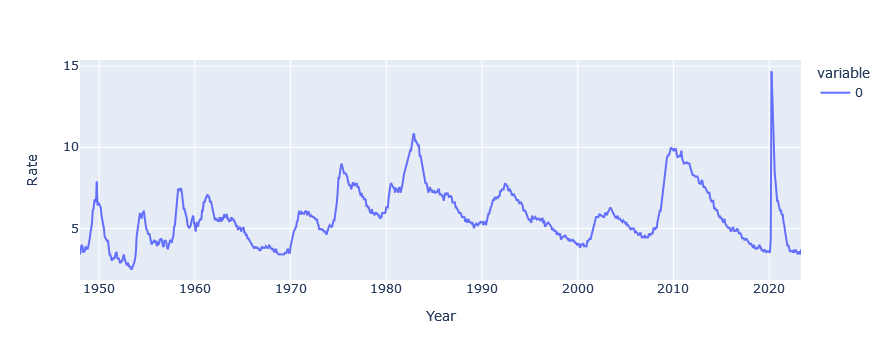

In [46]:
px.line(uemp_df,height=300,width=950,labels={'value':'Rate','index':'Year'})


```
As we can observe, there are various type of unemployment rates series. Series belonging to a certain communities, age and state too. Let's get the state data
```

#### Filtering the state wise Unemployment rates

In [94]:

unemployment_df = fred.search('unemployment rate state',filter=('frequency','Monthly'))
unemployment_df= unemployment_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemployment_df= unemployment_df.loc[unemployment_df['title'].str.contains('Unemployment Rate in')]



In [175]:
%%time
#unemployment_df

Wall time: 0 ns


In [106]:
unemployment_df= unemployment_df[~unemployment_df['title'].str.endswith('(DISCONTINUED)') & \
                                 ~unemployment_df['title'].str.endswith('Division') \
                                 & ~unemployment_df['title'].str.endswith('Region')]


### Removing the divison, region wise and the series which got discontinued

In [97]:
unemployment_df

id realtime_start realtime_end  \
series id                                                                
CAUR                                  CAUR     2023-06-29   2023-06-29   
TXUR                                  TXUR     2023-06-29   2023-06-29   
FLUR                                  FLUR     2023-06-29   2023-06-29   
NYUR                                  NYUR     2023-06-29   2023-06-29   
OHUR                                  OHUR     2023-06-29   2023-06-29   
NCUR                                  NCUR     2023-06-29   2023-06-29   
MIUR                                  MIUR     2023-06-29   2023-06-29   
MNUR                                  MNUR     2023-06-29   2023-06-29   
ILUR                                  ILUR     2023-06-29   2023-06-29   
NJUR                                  NJUR     2023-06-29   2023-06-29   
PAUR                                  PAUR     2023-06-29   2023-06-29   
ALUR                                  ALUR     2023-06-29   2023-06-29   
VAUR                                  VAUR     2023-06-29   2023-06-29   
COUR                                  COUR     2023-06-29   2023-06-29   
WIUR                                  WIUR     2023-06-29   2023-06-29   
ORUR                                  ORUR     2023-06-29   2023-06-29   
MAUR                                  MAUR     2023-06-29   2023-06-29   
GAUR                                  GAUR     2023-06-29   2023-06-29   
MOUR                                  MOUR     2023-06-29   2023-06-29   
TNUR                                  TNUR     2023-06-29   2023-06-29   
SCUR                                  SCUR     2023-06-29   2023-06-29   
KYUR                                  KYUR     2023-06-29   2023-06-29   
WAUR                                  WAUR     2023-06-29   2023-06-29   
WVUR                                  WVUR     2023-06-29   2023-06-29   
NMUR                                  NMUR     2023-06-29   2023-06-29   
AKUR                                  AKUR     2023-06-29   2023-06-29   
LAUR                                  LAUR     2023-06-29   2023-06-29   
UTUR                                  UTUR     2023-06-29   2023-06-29   
NVUR                                  NVUR     2023-06-29   2023-06-29   
AZUR                                  AZUR     2023-06-29   2023-06-29   
INUR                                  INUR     2023-06-29   2023-06-29   
ARUR                                  ARUR     2023-06-29   2023-06-29   
CTUR                                  CTUR     2023-06-29   2023-06-29   
LASMT261982000000003  LASMT261982000000003     2023-06-29   2023-06-29   
OKUR                                  OKUR     2023-06-29   2023-06-29   
KSUR                                  KSUR     2023-06-29   2023-06-29   
IAUR                                  IAUR     2023-06-29   2023-06-29   
MSUR                                  MSUR     2023-06-29   2023-06-29   
LASMT391746000000003  LASMT391746000000003     2023-06-29   2023-06-29   
MDUR                                  MDUR     2023-06-29   2023-06-29   
NDUR                                  NDUR     2023-06-29   2023-06-29   
HIUR                                  HIUR     2023-06-29   2023-06-29   
NHUR                                  NHUR     2023-06-29   2023-06-29   
NEUR                                  NEUR     2023-06-29   2023-06-29   
PRUR                                  PRUR     2023-06-29   2023-06-29   
DCUR                                  DCUR     2023-06-29   2023-06-29   
MTUR                                  MTUR     2023-06-29   2023-06-29   
MEUR                                  MEUR     2023-06-29   2023-06-29   
WYUR                                  WYUR     2023-06-29   2023-06-29   
DEUR                                  DEUR     2023-06-29   2023-06-29   
SDUR                                  SDUR     2023-06-29   2023-06-29   
IDUR                                  IDUR     2023-06-29   2023-06-29   
VTUR                                  VTUR  

In [83]:
unemployment_df.shape

(54, 15)

In [98]:
unemployment_df.index

Index(['CAUR', 'TXUR', 'FLUR', 'NYUR', 'OHUR', 'NCUR', 'MIUR', 'MNUR', 'ILUR',
       'NJUR', 'PAUR', 'ALUR', 'VAUR', 'COUR', 'WIUR', 'ORUR', 'MAUR', 'GAUR',
       'MOUR', 'TNUR', 'SCUR', 'KYUR', 'WAUR', 'WVUR', 'NMUR', 'AKUR', 'LAUR',
       'UTUR', 'NVUR', 'AZUR', 'INUR', 'ARUR', 'CTUR', 'LASMT261982000000003',
       'OKUR', 'KSUR', 'IAUR', 'MSUR', 'LASMT391746000000003', 'MDUR', 'NDUR',
       'HIUR', 'NHUR', 'NEUR', 'PRUR', 'DCUR', 'MTUR', 'MEUR', 'WYUR', 'DEUR',
       'SDUR', 'IDUR', 'VTUR', 'RIUR'],
      dtype='object', name='series id')

In [101]:
unemployment_df= unemployment_df.drop(['LASMT261982000000003','LASMT391746000000003'])
### Dropping the unnecessary index

In [103]:
unemployment_df.shape

(52, 15)

In [104]:
unemployment_df.head()

id realtime_start realtime_end                            title  \
series id                                                                      
CAUR       CAUR     2023-06-29   2023-06-29  Unemployment Rate in California   
TXUR       TXUR     2023-06-29   2023-06-29       Unemployment Rate in Texas   
FLUR       FLUR     2023-06-29   2023-06-29     Unemployment Rate in Florida   
NYUR       NYUR     2023-06-29   2023-06-29    Unemployment Rate in New York   
OHUR       OHUR     2023-06-29   2023-06-29        Unemployment Rate in Ohio   

          observation_start observation_end frequency frequency_short  \
series id                                                               
CAUR             1976-01-01      2023-05-01   Monthly               M   
TXUR             1976-01-01      2023-05-01   Monthly               M   
FLUR             1976-01-01      2023-05-01   Monthly               M   
NYUR             1976-01-01      2023-05-01   Monthly               M   
OHUR             1976-01-01      2023-05-01   Monthly               M   

             units units_short  seasonal_adjustment seasonal_adjustment_short  \
series id                                                                       
CAUR       Percent           %  Seasonally Adjusted                        SA   
TXUR       Percent           %  Seasonally Adjusted                        SA   
FLUR       Percent           %  Seasonally Adjusted                        SA   
NYUR       Percent           %  Seasonally Adjusted                        SA   
OHUR       Percent           %  Seasonally Adjusted                        SA   

                        last_updated popularity notes  
series id                                              
CAUR       2023-06-20 14:30:02-05:00         60  None  
TXUR       2023-06-20 14:30:04-05:00         51  None  
FLUR       2023-06-20 14:30:03-05:00         49  None  
NYUR       2023-06-20 14:30:04-05:00         49  None  
OHUR       2023-06-20 14:30:05-05:00         37  None

In [105]:
unemployment_df.index

Index(['CAUR', 'TXUR', 'FLUR', 'NYUR', 'OHUR', 'NCUR', 'MIUR', 'MNUR', 'ILUR',
       'NJUR', 'PAUR', 'ALUR', 'VAUR', 'COUR', 'WIUR', 'ORUR', 'MAUR', 'GAUR',
       'MOUR', 'TNUR', 'SCUR', 'KYUR', 'WAUR', 'WVUR', 'NMUR', 'AKUR', 'LAUR',
       'UTUR', 'NVUR', 'AZUR', 'INUR', 'ARUR', 'CTUR', 'OKUR', 'KSUR', 'IAUR',
       'MSUR', 'MDUR', 'NDUR', 'HIUR', 'NHUR', 'NEUR', 'PRUR', 'DCUR', 'MTUR',
       'MEUR', 'WYUR', 'DEUR', 'SDUR', 'IDUR', 'VTUR', 'RIUR'],
      dtype='object', name='series id')

**We have extracted the state wise unemployment rates.
</br>
Hereafter, we will extract all the series of the state from the fred website**

In [115]:
state_unemp = []

for series_id in unemployment_df.index:
    results = fred.get_series(series_id)
    results = results.to_frame(name=series_id)
    state_unemp.append(results)
    

In [120]:
uemp_df_state= pd.concat(state_unemp,axis=1)

In [149]:
id_to_state = unemployment_df['title'].str.replace('Unemployment Rate in ','').to_dict()

In [152]:
uemp_df_state.columns = [id_to_state[c] for c in uemp_df_state.columns]

KeyError: 'California'

In [153]:
uemp_df_state.describe()

California       Texas     Florida    New York        Ohio  \
count  569.000000  569.000000  569.000000  569.000000  569.000000   
mean     7.205624    5.955009    5.956063    6.483304    6.577856   
std      2.202960    1.435704    2.137501    1.818688    2.177187   
min      3.800000    3.400000    2.400000    3.700000    3.600000   
25%      5.400000    4.800000    4.400000    4.900000    5.000000   
50%      6.900000    5.800000    5.700000    6.300000    6.000000   
75%      8.500000    6.900000    7.300000    7.800000    7.600000   
max     16.100000   12.800000   14.100000   16.600000   16.400000   

       North Carolina    Michigan  Minnesota    Illinois  New Jersey  \
count      569.000000  569.000000  569.00000  569.000000  569.000000   
mean         5.770475    7.711599    4.74587    6.828295    6.227768   
std          2.026082    3.047893    1.42548    2.106335    2.080993   
min          3.100000    3.200000    2.30000    3.600000    3.000000   
25%          4.300000    5.100000    3.80000    5.200000    4.500000   
50%          5.300000    7.300000    4.50000    6.300000    5.900000   
75%          6.400000    9.200000    5.60000    8.300000    7.500000   
max         14.200000   22.600000   11.10000   18.000000   15.300000   

       Pennsylvania     Alabama    Virginia    Colorado   Wisconsin  \
count    569.000000  569.000000  569.000000  569.000000  569.000000   
mean       6.370650    6.807909    4.651142    5.279613    5.277153   
std        1.776272    2.612569    1.358711    1.768734    1.909651   
min        4.000000    2.200000    2.100000    2.400000    2.400000   
25%        4.900000    4.800000    3.800000    3.800000    3.900000   
50%        5.800000    6.500000    4.500000    5.300000    4.800000   
75%        7.600000    7.700000    5.500000    6.200000    6.400000   
max       16.200000   14.900000   12.000000   11.600000   14.100000   

           Oregon  Massachusetts     Georgia    Missouri   Tennessee  \
count  569.000000     569.000000  569.000000  569.000000  569.000000   
mean     6.824956       5.524253    5.876626    5.744288    6.201933   
std      2.060274       1.963472    1.821816    1.774598    2.122012   
min      3.400000       2.700000    2.900000    2.100000    3.200000   
25%      5.300000       4.000000    4.800000    4.600000    4.800000   
50%      6.200000       5.200000    5.500000    5.600000    5.700000   
75%      8.300000       6.700000    6.600000    6.600000    7.500000   
max     13.700000      16.900000   12.400000   11.400000   15.800000   

       South Carolina    Kentucky  Washington  West Virginia  New Mexico  \
count      569.000000  569.000000  569.000000     569.000000  569.000000   
mean         6.288225    6.510545    6.678910       7.931107    6.656942   
std          2.139736    2.070916    1.873258       2.937416    1.473029   
min          2.400000    3.700000    3.800000       3.300000    3.400000   
25%          4.800000    5.100000    5.200000       5.800000    5.600000   
50%          6.100000    5.700000    6.300000       7.000000    6.700000   
75%          7.200000    8.000000    7.900000       9.700000    7.500000   
max         12.100000   16.700000   16.600000      18.400000   10.500000   

           Alaska   Louisiana       Utah      Nevada     Arizona     Indiana  \
count  569.000000  569.000000  569.00000  569.000000  569.000000  569.000000   
mean     7.686292    6.980316    4.65167    6.685764    6.195606    5.900879   
std      1.604139    2.199031    1.66248    2.895016    1.858062    2.390632   
min      3.600000    3.500000    2.20000    3.800000    3.400000    2.800000   
25%      6.500000    5.500000    3.40000    4.700000    4.800000    4.400000   
50%      7.300000    6.600000    4.40000    5.800000    5.800000    5.400000   
75%      8.900000    7.600000    5.70000    7.600000    7.100000    7.000000   
max     11.900000   13.500000   10.00000   30.600000   13.800000   16.800000   

         Arkansas  Connecticut    Oklahom

Wall time: 995 ms


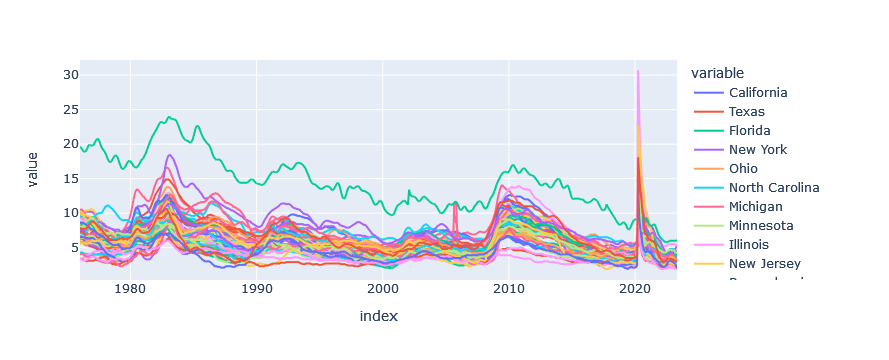

In [154]:
%%time
### Plotting
px.line(uemp_df_state)

Wall time: 123 ms


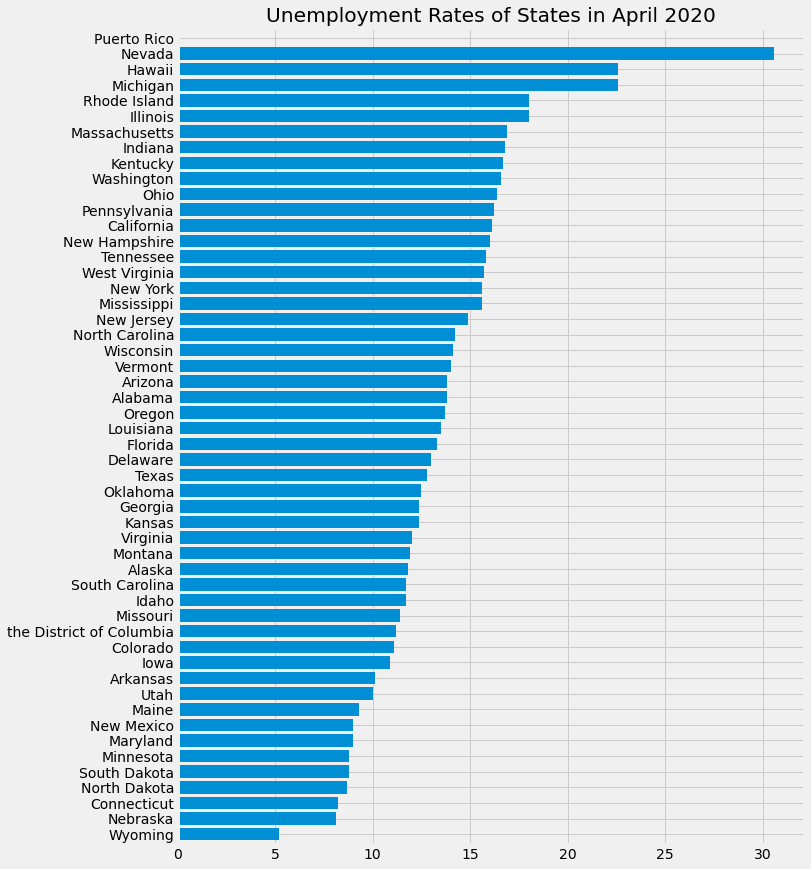

In [165]:
%%time
state_plot = uemp_df_state.loc[uemp_df_state.index == '2020-04-01'].T \
    .sort_values('2020-04-01') \
    .plot(kind='barh',figsize=(10,14),
          title='Unemployment Rates of States in April 2020',
          legend=False,
         width=0.8)




**Lets switch the code with actual states name

In [139]:
unemployment_df.head()

id realtime_start realtime_end                            title  \
series id                                                                      
CAUR       CAUR     2023-06-29   2023-06-29  Unemployment Rate in California   
TXUR       TXUR     2023-06-29   2023-06-29       Unemployment Rate in Texas   
FLUR       FLUR     2023-06-29   2023-06-29     Unemployment Rate in Florida   
NYUR       NYUR     2023-06-29   2023-06-29    Unemployment Rate in New York   
OHUR       OHUR     2023-06-29   2023-06-29        Unemployment Rate in Ohio   

          observation_start observation_end frequency frequency_short  \
series id                                                               
CAUR             1976-01-01      2023-05-01   Monthly               M   
TXUR             1976-01-01      2023-05-01   Monthly               M   
FLUR             1976-01-01      2023-05-01   Monthly               M   
NYUR             1976-01-01      2023-05-01   Monthly               M   
OHUR             1976-01-01      2023-05-01   Monthly               M   

             units units_short  seasonal_adjustment seasonal_adjustment_short  \
series id                                                                       
CAUR       Percent           %  Seasonally Adjusted                        SA   
TXUR       Percent           %  Seasonally Adjusted                        SA   
FLUR       Percent           %  Seasonally Adjusted                        SA   
NYUR       Percent           %  Seasonally Adjusted                        SA   
OHUR       Percent           %  Seasonally Adjusted                        SA   

                        last_updated popularity notes  
series id                                              
CAUR       2023-06-20 14:30:02-05:00         60  None  
TXUR       2023-06-20 14:30:04-05:00         51  None  
FLUR       2023-06-20 14:30:03-05:00         49  None  
NYUR       2023-06-20 14:30:04-05:00         49  None  
OHUR       2023-06-20 14:30:05-05:00         37  None

----

## Pulling Participation rate

In [171]:
part_df = fred.search('participation rate state',filter=('frequency','Monthly'))
part_df= part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [182]:
part_df.head(3)

id realtime_start realtime_end  \
series id                                        
LBSSA01    LBSSA01     2023-06-29   2023-06-29   
LBSSA12    LBSSA12     2023-06-29   2023-06-29   
LBSSA06    LBSSA06     2023-06-29   2023-06-29   

                                                   title observation_start  \
series id                                                                    
LBSSA01       Labor Force Participation Rate for Alabama        1976-01-01   
LBSSA12       Labor Force Participation Rate for Florida        1976-01-01   
LBSSA06    Labor Force Participation Rate for California        1976-01-01   

          observation_end frequency frequency_short    units units_short  \
series id                                                                  
LBSSA01        2023-05-01   Monthly               M  Percent           %   
LBSSA12        2023-05-01   Monthly               M  Percent           %   
LBSSA06        2023-05-01   Monthly               M  Percent           %   

           seasonal_adjustment seasonal_adjustment_short  \
series id                                                  
LBSSA01    Seasonally Adjusted                        SA   
LBSSA12    Seasonally Adjusted                        SA   
LBSSA06    Seasonally Adjusted                        SA   

                       last_updated popularity  \
series id                                        
LBSSA01   2023-06-16 09:01:08-05:00          7   
LBSSA12   2023-06-16 09:01:02-05:00         22   
LBSSA06   2023-06-16 09:01:05-05:00         12   

                                                                                                                                                           notes  
series id                                                                                                                                                         
LBSSA01    A state's labor-force participation rate is the number of all employed and unemployed workers divided against the state's civilian population.  Di...  
LBSSA12    A state's labor-force participation rate is the number of all employed and unemployed workers divided against the state's civilian population.  Di...  
LBSSA06    A state's labor-force participation rate is the number of all employed and unemployed workers divided against the state's civilian population.  Di...

In [173]:
part_df.shape

(109, 15)

In [176]:
part_df= part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate for ')]


In [180]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

In [181]:
%%time
state_part = []

for series_id in part_df.index:
    results = fred.get_series(series_id)
    results = results.to_frame(name=series_id)
    state_part.append(results)

state_part = pd.concat(state_part,axis=1)

Wall time: 30.3 s


In [187]:
state_part

LBSSA01  LBSSA12  LBSSA06  LBSSA27  LBSSA55  LBSSA39  LBSSA21  \
1976-01-01     57.0     55.8     62.6     65.6     65.6     61.7     60.5   
1976-02-01     56.9     55.7     62.4     65.5     65.5     61.7     60.3   
1976-03-01     56.8     55.5     62.2     65.4     65.4     61.7     60.2   
1976-04-01     56.8     55.5     62.2     65.4     65.4     61.6     60.1   
1976-05-01     56.8     55.4     62.3     65.5     65.5     61.6     60.1   
...             ...      ...      ...      ...      ...      ...      ...   
2023-01-01     56.7     59.1     62.1     68.1     64.5     61.2     57.5   
2023-02-01     56.7     59.1     62.2     68.0     64.5     61.4     57.5   
2023-03-01     56.7     59.3     62.3     68.0     64.6     61.5     57.5   
2023-04-01     56.8     59.3     62.4     68.1     64.8     61.8     57.6   
2023-05-01     56.9     59.4     62.5     68.2     65.1     62.1     57.7   

            LBSSA51  LBSSA22  LBSSA19  LBSSA42  LBSSA26  LBSSA23  LBSSA25  \
1976-01-01     65.9     56.8     64.4     58.4     61.6     62.1     64.8   
1976-02-01     65.8     56.6     64.3     58.3     61.5     61.9     64.7   
1976-03-01     65.6     56.5     64.2     58.3     61.5     61.9     64.6   
1976-04-01     65.5     56.4     64.1     58.3     61.6     61.8     64.6   
1976-05-01     65.4     56.4     64.1     58.3     61.7     61.7     64.6   
...             ...      ...      ...      ...      ...      ...      ...   
2023-01-01     65.4     58.8     68.1     61.9     59.8     58.0     64.8   
2023-02-01     65.6     59.0     68.1     61.9     59.8     58.0     65.0   
2023-03-01     65.9     59.3     68.2     62.0     59.9     58.0     65.0   
2023-04-01     66.2     59.5     68.3     62.0     60.2     58.1     64.8   
2023-05-01     66.5     59.6     68.5     62.0     60.5     58.3     64.7   

            LBSSA48  LBSSA13  LBSSA54  LBSSA36  LBSSA24  LBSSA04  LBSSA34  \
1976-01-01     63.8     63.7     52.5     58.0     64.3     59.5     61.5   
1976-02-01     63.5     63.6     52.4     58.0     64.2     59.2     61.4   
1976-03-01     63.4     63.5     52.3     58.0     64.1     59.1     61.4   
1976-04-01     63.5     63.5     52.3     58.0     64.1     59.1     61.5   
1976-05-01     63.6     63.6     52.2     58.1     64.1     59.1     61.6   
...             ...      ...      ...      ...      ...      ...      ...   
2023-01-01     63.5     61.0     54.7     60.5     64.7     61.6     64.3   
2023-02-01     63.7     61.1     54.6     60.6     64.7     61.6     64.5   
2023-03-01     63.9     61.1     54.6     60.7     64.9     61.6     64.8   
2023-04-01     64.1     61.2     54.6     60.8     65.1     61.6     65.0   
2023-05-01     64.2     61.3     54.6     61.0     65.3     61.7     65.2   

            LBSSA37  LBSSA28  LBSSA47  LBSSA49  LBSSA33  LBSSA16  LBSSA29  \
1976-01-01     66.5     58.8     59.6     62.8     65.9     63.0     60.5   
1976-02-01     66.3     58.6     59.4     62.6     65.6     62.8     60.3   
1976-03-01     66.2     58.5     59.3     62.5     65.6     62.7     60.3   
1976-04-01     66.2     58.5     59.3     62.5     65.7     62.7     60.4   
1976-05-01     66.3     58.5     59.4     62.6     66.0     62.8     60.6   
...             ...      ...      ...      ...      ...      ...      ...   
2023-01-01     60.4     54.4     58.9     68.6     66.1     62.6     62.7   
2023-02-01     60.4     54.4     58.9     68.7     66.0     62.6     62.8   
2023-03-01     60.4     54.4     59.0     68.9     65.8     62.6     62.9   
2023-04-01     60.5     54.5     59.1     69.1     65.6     62.5     63.2   
2023-05-01     60.6     54.6     59.2     69.4     65.3     62.5     63.4   

            LBSSA09  LBSSA35  LBSSA17  LBSSA08  LBSSA45  LBSSA18  LBSSA31  \
1976-01-01     64.2     60.8     63.0     67.2     65.3     64.0     64.9   
1976-02-01     64.1     60.5     63.0     67.0     65.2     63.9     64.9   
1976-03-01     64.0     60.3     62.9     66.8     65.0     63.8     64.8   
1976

In [188]:
state_part.columns = [part_id_to_state[c] for c in state_part.columns]

In [189]:
state_part

Alabama  Florida  California  Minnesota  Wisconsin  Ohio  \
1976-01-01     57.0     55.8        62.6       65.6       65.6  61.7   
1976-02-01     56.9     55.7        62.4       65.5       65.5  61.7   
1976-03-01     56.8     55.5        62.2       65.4       65.4  61.7   
1976-04-01     56.8     55.5        62.2       65.4       65.4  61.6   
1976-05-01     56.8     55.4        62.3       65.5       65.5  61.6   
...             ...      ...         ...        ...        ...   ...   
2023-01-01     56.7     59.1        62.1       68.1       64.5  61.2   
2023-02-01     56.7     59.1        62.2       68.0       64.5  61.4   
2023-03-01     56.7     59.3        62.3       68.0       64.6  61.5   
2023-04-01     56.8     59.3        62.4       68.1       64.8  61.8   
2023-05-01     56.9     59.4        62.5       68.2       65.1  62.1   

            Kentucky  Virginia  Louisiana  Iowa  Pennsylvania  Michigan  \
1976-01-01      60.5      65.9       56.8  64.4          58.4      61.6   
1976-02-01      60.3      65.8       56.6  64.3          58.3      61.5   
1976-03-01      60.2      65.6       56.5  64.2          58.3      61.5   
1976-04-01      60.1      65.5       56.4  64.1          58.3      61.6   
1976-05-01      60.1      65.4       56.4  64.1          58.3      61.7   
...              ...       ...        ...   ...           ...       ...   
2023-01-01      57.5      65.4       58.8  68.1          61.9      59.8   
2023-02-01      57.5      65.6       59.0  68.1          61.9      59.8   
2023-03-01      57.5      65.9       59.3  68.2          62.0      59.9   
2023-04-01      57.6      66.2       59.5  68.3          62.0      60.2   
2023-05-01      57.7      66.5       59.6  68.5          62.0      60.5   

            Maine  Massachusetts  Texas  Georgia  West Virginia  New York  \
1976-01-01   62.1           64.8   63.8     63.7           52.5      58.0   
1976-02-01   61.9           64.7   63.5     63.6           52.4      58.0   
1976-03-01   61.9           64.6   63.4     63.5           52.3      58.0   
1976-04-01   61.8           64.6   63.5     63.5           52.3      58.0   
1976-05-01   61.7           64.6   63.6     63.6           52.2      58.1   
...           ...            ...    ...      ...            ...       ...   
2023-01-01   58.0           64.8   63.5     61.0           54.7      60.5   
2023-02-01   58.0           65.0   63.7     61.1           54.6      60.6   
2023-03-01   58.0           65.0   63.9     61.1           54.6      60.7   
2023-04-01   58.1           64.8   64.1     61.2           54.6      60.8   
2023-05-01   58.3           64.7   64.2     61.3           54.6      61.0   

            Maryland  Arizona  New Jersey  North Carolina  Mississippi  \
1976-01-01      64.3     59.5        61.5            66.5         58.8   
1976-02-01      64.2     59.2        61.4            66.3         58.6   
1976-03-01      64.1     59.1        61.4            66.2         58.5   
1976-04-01      64.1     59.1        61.5            66.2         58.5   
1976-05-01      64.1     59.1        61.6            66.3         58.5   
...              ...      ...         ...             ...          ...   
2023-01-01      64.7     61.6        64.3            60.4         54.4   
2023-02-01      64.7     61.6        64.5            60.4         54.4   
2023-03-01      64.9     61.6        64.8            60.4         54.4   
2023-04-01      65.1     61.6        65.0            60.5         54.5   
2023-05-01      65.3     61.7        65.2            60.6         54.6   

            Tennessee  Utah  New Hampshire  Idaho  Missouri  Connecticut  \
1976-01-01       59.6  62.8           65.9   63.0      60.5         64.2   
1976-02-01       59.4  62.6           65.6   62.8      60.3         64.1   
1976-03-01       59.3  62.5           65.6   62.7      60.3         64.0   
1976-04-01       59.3  62.5           65.7   62.7      60.4         64.1   
1976-05-01       59.4  62.6           66.0   62.8   

### Unemployment rate vs Participation 

In [197]:
## fixing columbia district name
uemp_df_state.rename(columns = {'the District of Columbia':'District of Columbia'})

California  Texas  Florida  New York  Ohio  North Carolina  \
1976-01-01         9.2    5.8      9.7      10.3   8.1             6.4   
1976-02-01         9.2    5.8      9.7      10.3   8.1             6.4   
1976-03-01         9.1    5.9      9.6      10.2   8.1             6.4   
1976-04-01         9.1    5.9      9.5      10.2   8.0             6.3   
1976-05-01         9.0    5.9      9.3      10.1   7.8             6.1   
...                ...    ...      ...       ...   ...             ...   
2023-01-01         4.2    3.9      2.6       4.2   4.0             3.8   
2023-02-01         4.4    4.0      2.6       4.2   3.9             3.6   
2023-03-01         4.4    4.0      2.6       4.1   3.8             3.5   
2023-04-01         4.5    4.0      2.6       4.0   3.7             3.4   
2023-05-01         4.5    4.1      2.6       3.9   3.6             3.4   

            Michigan  Minnesota  Illinois  New Jersey  Pennsylvania  Alabama  \
1976-01-01       9.9        6.0       6.6        10.3           8.0      6.6   
1976-02-01       9.9        6.0       6.6        10.3           8.1      6.6   
1976-03-01       9.9        5.9       6.6        10.3           8.1      6.6   
1976-04-01       9.8        5.8       6.6        10.3           8.1      6.5   
1976-05-01       9.6        5.7       6.6        10.3           8.1      6.4   
...              ...        ...       ...         ...           ...      ...   
2023-01-01       4.3        2.9       4.5         3.4           4.3      2.6   
2023-02-01       4.3        3.0       4.5         3.5           4.4      2.5   
2023-03-01       4.1        2.8       4.4         3.5           4.2      2.3   
2023-04-01       3.8        2.8       4.2         3.5           4.1      2.2   
2023-05-01       3.7        2.9       4.1         3.6           4.0      2.2   

            Virginia  Colorado  Wisconsin  Oregon  Massachusetts  Georgia  \
1976-01-01       6.1       5.8        5.8     9.5           10.5      8.4   
1976-02-01       6.1       5.7        5.8     9.5           10.5      8.4   
1976-03-01       6.1       5.7        5.7     9.4           10.5      8.4   
1976-04-01       6.0       5.6        5.6     9.2           10.3      8.3   
1976-05-01       5.9       5.6        5.5     9.1           10.1      8.1   
...              ...       ...        ...     ...            ...      ...   
2023-01-01       3.2       2.8        2.9     4.8            3.5      3.1   
2023-02-01       3.2       2.9        2.7     4.7            3.7      3.1   
2023-03-01       3.2       2.8        2.5     4.4            3.5      3.1   
2023-04-01       3.1       2.8        2.4     4.0            3.1      3.1   
2023-05-01       2.9       2.8        2.4     3.7            2.8      3.2   

            Missouri  Tennessee  South Carolina  Kentucky  Washington  \
1976-01-01       5.9        6.0             7.4       5.6         8.5   
1976-02-01       5.9        6.0             7.4       5.6         8.5   
1976-03-01       5.9        6.0             7.3       5.6         8.4   
1976-04-01       6.0        6.0             7.2       5.6         8.5   
1976-05-01       6.0        5.9             7.0       5.5         8.5   
...              ...        ...             ...       ...         ...   
2023-01-01       2.7        3.5             3.2       3.9         4.6   
2023-02-01       2.6        3.5             3.2       3.9         4.6   
2023-03-01       2.5        3.4             3.2       3.8         4.5   
2023-04-01       2.5        3.3             3.1       3.7         4.3   
2023-05-01       2.5        3.3             3.1       3.8         4.1   

            West Virginia  New Mexico  Alaska  Louisiana  Utah  Nevada  \
1976-01-01            7.5         8.6     7.1        6.3   5.8     9.2   
1976-02-01            7.5         8.7     7.1        6.3   5.9     9.2   
1976-03-01            7.5         8.7     7.0        6.3   5.8     9.2   
1976-04-01            7.5         8.6     6.9        6.4   5.8  

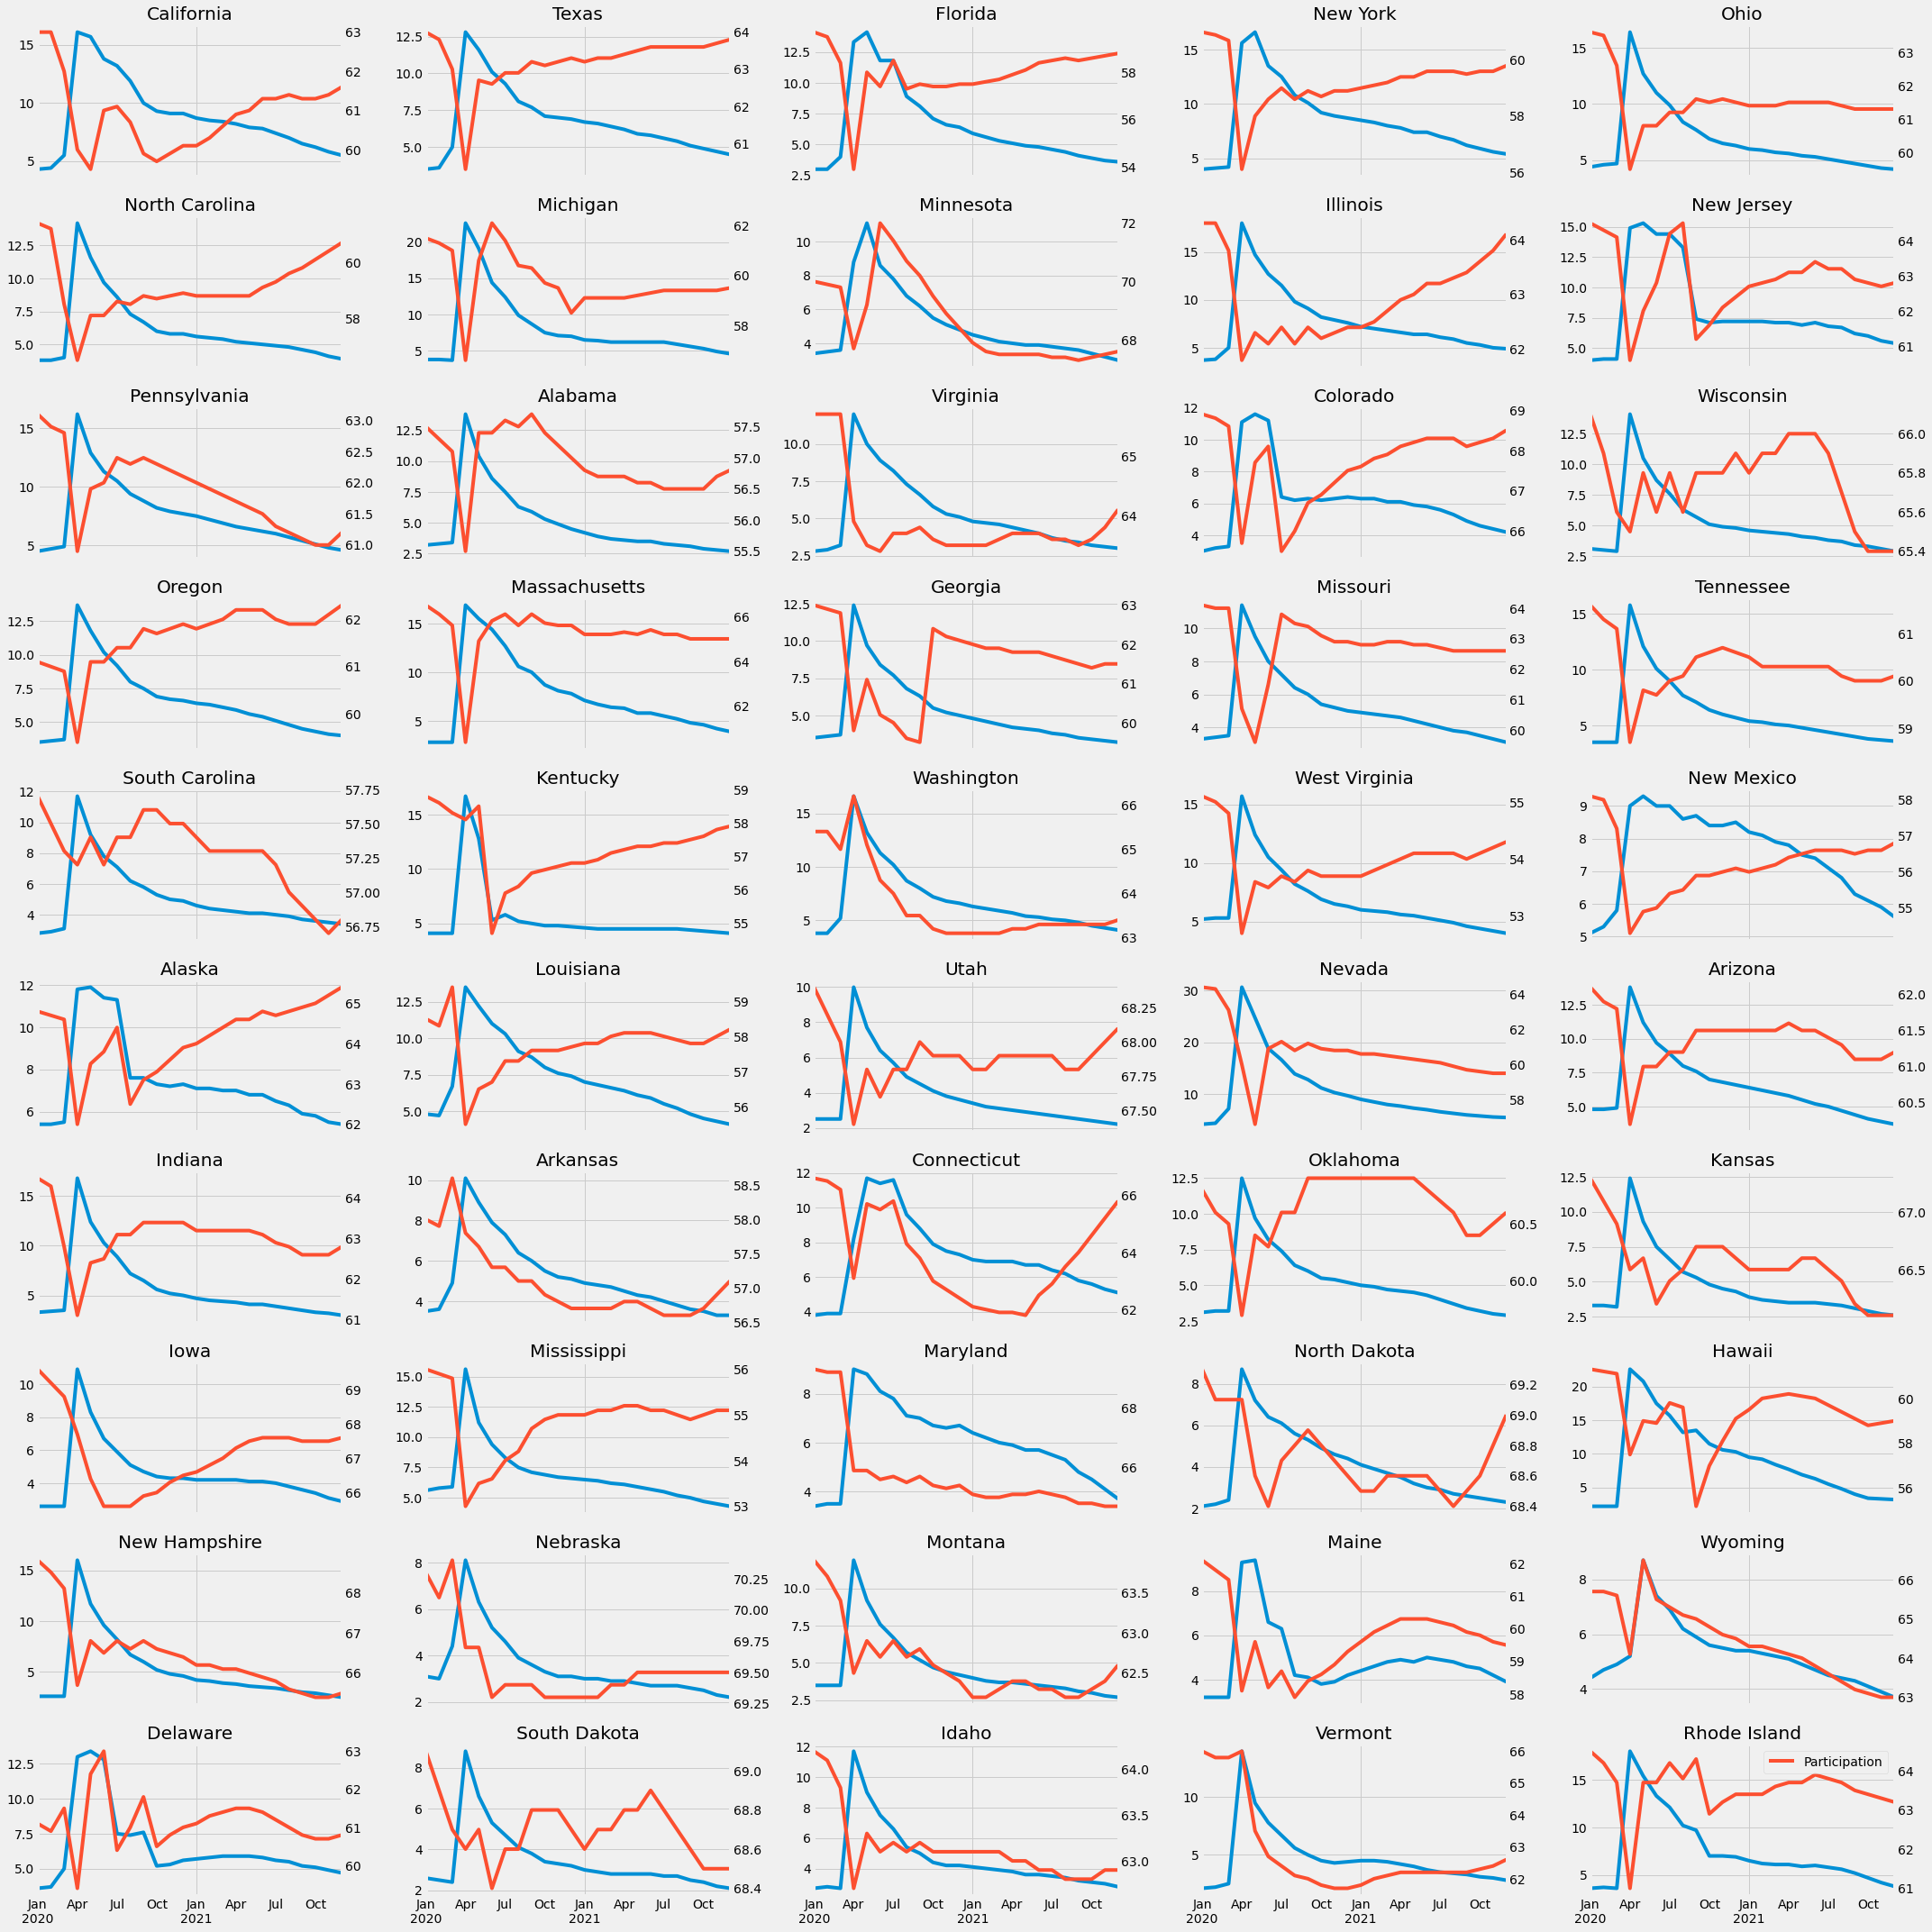

In [207]:
fig,axs = plt.subplots(10,5,figsize=(30,30),sharex=True)
axs = axs.flatten()
i=0
for state in uemp_df_state.columns:
    if state in['District of Columbia','Puerto Rico','the District of Columbia']:
        continue
    ax2 = axs[i].twinx()
    uemp_df_state.query('index >=2020 and index <2022')[state]\
                    .plot(ax=axs[i],label='Unemployment')
    state_part.query('index >=2020 and index <2022')[state]\
                .plot(ax=ax2,label='Participation',color=color_pallete[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.legend()
plt.show()